In [8]:
# Imports
import pandas as pd
import numpy as np
from os import listdir
import statistics
import matplotlib.pyplot as plt

print("Done.")

Done.


## Read in the .CSV file to do EDA on: 

In [9]:
# Read in the .CSV file
def find_csv_filenames( path_to_dir, suffix=".csv" ):
    filenames = listdir(path_to_dir)
    names = [ filename for filename in filenames if filename.endswith( suffix ) ]
    return names

In [10]:
# Print the names of all .csv files in the directory (change the path name to your local path):
path = '/Users/jasminesimmons/Smartfin/Smartfin/Mini_Projects/ML_Wave_Stats/'
names = find_csv_filenames( path, suffix=".csv" )
print(len(names))
print(names)

3
['CSE258_A2_Final_Combined_csv.csv', 'CSE258_A2_Data_Jasmine_Combined_Copy.csv', 'CSE258_A2_Data_Adrian_Combined.csv']


In [11]:
data_csv = pd.read_csv('CSE258_A2_Final_Combined_csv.csv')
data_csv = data_csv.drop(columns=['Unnamed: 0'])
data_csv[:10]
#data_csv[:-10]

/Users/jasminesimmons/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,identifier,UTC,IMU A1,IMU A2,IMU A3,IMU G1,IMU G2,IMU G3,IMU M1,IMU M2,IMU M3,Date,Time,Hs(ft),Tp(s),Dp(deg)
0,facebook_10213517683684254_0006667E2297_180519...,2018-05-19T16:37:33.3380+00:00,2.949656,-11.760319,-10.745177,112.317073,10.609756,32.560976,79.0,171.0,593.0,2018-05-19,16:37,3.15,7.14,288.0
1,facebook_10213517683684254_0006667E2297_180519...,2018-05-19T16:37:33.5890+00:00,2.279280,-9.193734,-7.872135,304.634146,57.439024,11.829268,96.0,214.0,358.0,2018-05-19,16:37,3.15,7.14,288.0
2,facebook_10213517683684254_0006667E2297_180519...,2018-05-19T16:37:33.8400+00:00,-1.647211,1.053449,-8.197746,395.365854,0.853659,-24.390244,126.0,-140.0,194.0,2018-05-19,16:37,3.15,7.14,288.0
3,facebook_10213517683684254_0006667E2297_180519...,2018-05-19T16:37:34.0910+00:00,2.911349,22.677878,0.402226,352.073171,-21.951220,66.829268,111.0,-267.0,549.0,2018-05-19,16:37,3.15,7.14,288.0
4,facebook_10213517683684254_0006667E2297_180519...,2018-05-19T16:37:34.3410+00:00,-2.221819,10.591948,-0.019154,-4.146341,33.292683,10.365854,116.0,-256.0,570.0,2018-05-19,16:37,3.15,7.14,288.0
5,facebook_10213517683684254_0006667E2297_180519...,2018-05-19T16:37:34.5930+00:00,-1.493982,9.059659,0.517148,-11.951220,16.341463,-3.536585,96.0,-268.0,554.0,2018-05-19,16:37,3.15,7.14,288.0
6,facebook_10213517683684254_0006667E2297_180519...,2018-05-19T16:37:34.8440+00:00,-1.225831,9.710882,0.766145,7.073171,14.512195,-3.658537,97.0,-267.0,549.0,2018-05-19,16:37,3.15,7.14,288.0
7,facebook_10213517683684254_0006667E2297_180519...,2018-05-19T16:37:35.0960+00:00,-1.110910,9.749189,0.555455,-4.268293,9.146341,-1.829268,96.0,-260.0,560.0,2018-05-19,16:37,3.15,7.14,288.0
8,facebook_10213517683684254_0006667E2297_180519...,2018-05-19T16:37:35.3470+00:00,-0.881066,9.327810,0.842759,-5.975610,6.707317,0.243902,92.0,-262.0,554.0,2018-05-19,16:37,3.15,7.14,288.0
9,facebook_10213517683684254_0006667E2297_180519...,2018-05-19T16:37:35.5990+00:00,-0.861913,9.442731,1.015142,4.756098,7.926829,1.341463,94.0,-262.0,560.0,2018-05-19,16:37,3.15,7.14,288.0


## Compute the standard deviation and mean of the 28 rides

In [12]:
# Compute the standard deviation and mean of the 28 rides
columns = data_csv.columns
print(columns)

Index(['identifier', 'UTC', 'IMU A1', 'IMU A2', 'IMU A3', 'IMU G1', 'IMU G2',
       'IMU G3', 'IMU M1', 'IMU M2', 'IMU M3', 'Date', 'Time', 'Hs(ft)',
       'Tp(s)', 'Dp(deg)'],
      dtype='object')


In [13]:
data_csv['IMU A1'][0]

2.9496564453125

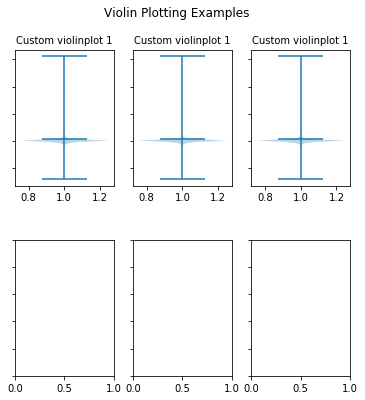

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


# fake data
fs = 10  # fontsize
pos = [1, 2, 4, 5, 7, 8]
data = [np.random.normal(0, std, size=100) for std in pos]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 6))

axes[0, 0].violinplot(data_csv['IMU A1'], showmeans=True, showextrema=True)
axes[0, 0].set_title('Violinplot of IMU A1', fontsize=fs)

axes[0, 1].violinplot(data_csv['IMU G1'], showmeans=True, showextrema=True)
axes[0, 1].set_title('Violinplot of IMU G1', fontsize=fs)

axes[0, 2].violinplot(data_csv['IMU M1'], showmeans=True, showextrema=True)
axes[0, 2].set_title('Violinplot of IMU M1', fontsize=fs)

for ax in axes.flat:
    ax.set_yticklabels([])

fig.suptitle("Violin Plotting Examples")
fig.subplots_adjust(hspace=0.4)
plt.show()

In [4]:
# Compute the standard deviation over each minute: 
def compute_standard_deviations(input_label): 
    old_time = '16:37'
    stds_minute_intervals = []
    wave_height_minute_intervals = []
    new_std = []
    minute_times = []
    for i in range(0, len(data_csv['Time'])):
        t = data_csv['Time'][i]
        if t != old_time: 
            #take the standard deviation and append it to stds
            if len(new_std) > 2:
                std = statistics.stdev(new_std)
                stds_minute_intervals.append(std)
                wave_height_minute_intervals.append(data_csv['Hs(ft)'][i-1])
                minute_times.append(data_csv['Time'][i-1])
                #reset new_std to be a new list
                new_std = []
            old_time = t
        else:
            new_std.append(data_csv[input_label][i])
    
    return stds_minute_intervals, wave_height_minute_intervals, minute_times

In [8]:
# Compute the standard deviation of A1, A2, A3 columns over minute intervals for significant wave height. 
a1_stds, a1_wave_heights, a1_minutes = compute_standard_deviations("IMU A1")
a2_stds, a2_wave_heights, a2_minutes = compute_standard_deviations("IMU A2")
a3_stds, a3_wave_heights, a3_minutes = compute_standard_deviations("IMU A3")

In [9]:
# Compute the standard deviation of G1, G2, G3 columns over minute intervals for significant wave height. 
g1_stds, g1_wave_heights, g1_minutes = compute_standard_deviations("IMU G1")
g2_stds, g2_wave_heights, g2_minutes = compute_standard_deviations("IMU G2")
g3_stds, g3_wave_heights, g3_minutes = compute_standard_deviations("IMU G3")

In [10]:
# Compute the standard deviation of M1, M2, M3 columns over minute intervals for significant wave height. 
m1_stds, m1_wave_heights, m1_minutes = compute_standard_deviations("IMU M1")
m2_stds, m2_wave_heights, m2_minutes = compute_standard_deviations("IMU M2")
m3_stds, m3_wave_heights, m3_minutes = compute_standard_deviations("IMU M3")

## Inputs vs. Wave Heights

Plotting A1, A2, A3, G1, G2, G3, M1, M2, M3 STDs vs. Wave Heights:


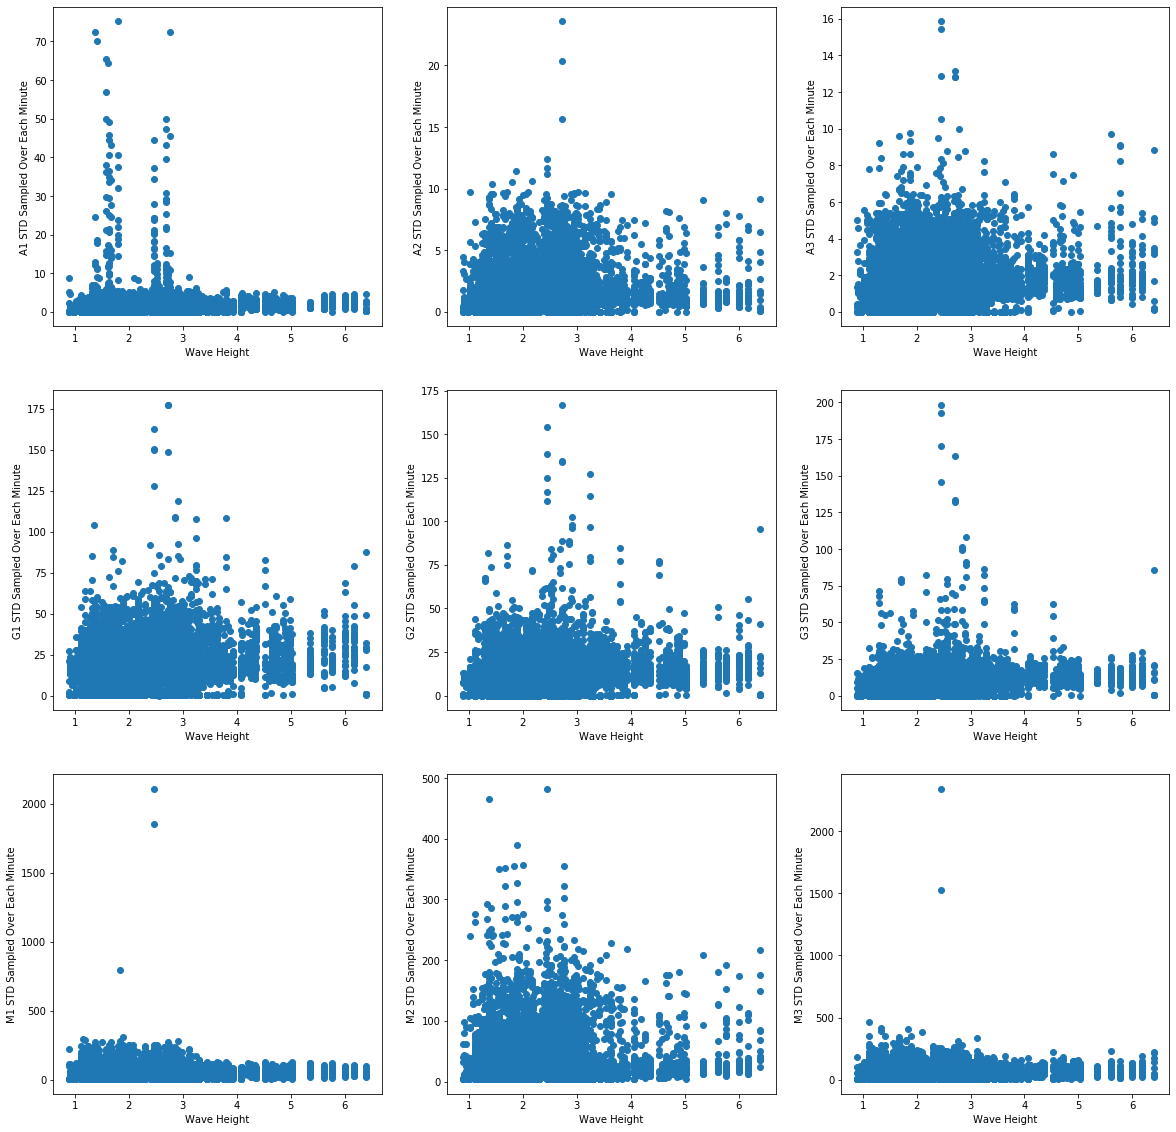

In [12]:
print("Plotting A1, A2, A3, G1, G2, G3, M1, M2, M3 STDs vs. Wave Heights:")
f = plt.figure(figsize=(20,20))
ax1 = f.add_subplot(331)
ax2 = f.add_subplot(332)
ax3 = f.add_subplot(333)
ax4 = f.add_subplot(334)
ax5 = f.add_subplot(335)
ax6 = f.add_subplot(336)
ax7 = f.add_subplot(337)
ax8 = f.add_subplot(338)
ax9 = f.add_subplot(339)


x1, y1 = a1_wave_heights, a1_stds
x2, y2 = a2_wave_heights, a2_stds
x3, y3 = a3_wave_heights, a3_stds

x4, y4 = g1_wave_heights, g1_stds
x5, y5 = g2_wave_heights, g2_stds
x6, y6 = g3_wave_heights, g3_stds

x7, y7 = m1_wave_heights, m1_stds
x8, y8 = m2_wave_heights, m2_stds
x9, y9 = m3_wave_heights, m3_stds

ax1.scatter(x1,y1)
ax1.set_xlabel("Wave Height")
ax1.set_ylabel("A1 STD Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax2.scatter(x2,y2)
ax2.set_xlabel("Wave Height")
ax2.set_ylabel("A2 STD Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax3.scatter(x3,y3)
ax3.set_xlabel("Wave Height")
ax3.set_ylabel("A3 STD Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

ax4.scatter(x4,y4)
ax4.set_xlabel("Wave Height")
ax4.set_ylabel("G1 STD Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax5.scatter(x5,y5)
ax5.set_xlabel("Wave Height")
ax5.set_ylabel("G2 STD Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax6.scatter(x6,y6)
ax6.set_xlabel("Wave Height")
ax6.set_ylabel("G3 STD Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

ax7.scatter(x7, y7)
ax7.set_xlabel("Wave Height")
ax7.set_ylabel("M1 STD Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax8.scatter(x8,y8)
ax8.set_xlabel("Wave Height")
ax8.set_ylabel("M2 STD Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax9.scatter(x9,y9)
ax9.set_xlabel("Wave Height")
ax9.set_ylabel("M3 STD Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

plt.show()

In [15]:
import statistics 
print(min(a1_wave_heights))
print(max(a1_wave_heights))
print(statistics.mean(a1_wave_heights))
print(statistics.stdev(a1_wave_heights))

0.89
6.4
2.3850187449790234
0.9172310948048343


## From this data (above), we don't really see a trend other than maybe that mid-wave heights (around 2.5-3ft) seem to have a higher standard deviation than wave heights on either end of the spectrum (smaller or larger wave heights).

In [ ]:
# Let's try plotting the mean values for each: 
def compute_means(input_label): 
    old_time = '16:37'
    means_minute_intervals = []
    wave_height_minute_intervals = []
    new_mean = []
    minute_times = []
    for i in range(0, len(data_csv['Time'])):
        t = data_csv['Time'][i]
        if t != old_time: 
            #take the standard deviation and append it to stds
            if len(new_mean) != 0:
                mean = statistics.mean(new_mean)
                means_minute_intervals.append(mean)
                wave_height_minute_intervals.append(data_csv['Hs(ft)'][i-1])
                minute_times.append(data_csv['Time'][i-1])
                #reset new_std to be a new list
                new_mean = []
            old_time = t
        else:
            new_mean.append(data_csv[input_label][i])
    
    return means_minute_intervals, wave_height_minute_intervals, minute_times

In [ ]:
# Compute the standard deviation of A1, A2, A3 columns over minute intervals for significant wave height. 
a1_means, a1_wave_heights, a1_minutes = compute_means("IMU A1")
a2_means, a2_wave_heights, a2_minutes = compute_means("IMU A2")
a3_means, a3_wave_heights, a3_minutes = compute_means("IMU A3")

In [ ]:
# Compute the standard deviation of G1, G2, G3 columns over minute intervals for significant wave height. 
g1_means, g1_wave_heights, g1_minutes = compute_means("IMU G1")
g2_means, g2_wave_heights, g2_minutes = compute_means("IMU G2")
g3_means, g3_wave_heights, g3_minutes = compute_means("IMU G3")

In [ ]:
# Compute the standard deviation of M1, M2, M3 columns over minute intervals for significant wave height. 
m1_means, m1_wave_heights, m1_minutes = compute_means("IMU M1")
m2_means, m2_wave_heights, m2_minutes = compute_means("IMU M2")
m3_means, m3_wave_heights, m3_minutes = compute_means("IMU M3")

In [ ]:
x = a1_wave_heights
y = a1_means
plt.xlabel('Wave Heights')
plt.ylabel('Mean of A1 Values over Minute Intervals')
axes = plt.gca()
axes.set_ylim([0,10])
plt.scatter(x, y)
plt.show()

In [ ]:
print("Plotting A1, A2, A3 Means vs. Wave Heights:")
f = plt.figure(figsize=(15,3))
ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

x1, y1 = a1_wave_heights, a1_means
x2, y2 = a2_wave_heights, a2_means
x3, y3 = a3_wave_heights, a3_means

ax1.scatter(x1,y1)
ax1.set_xlabel("Wave Height")
ax1.set_ylabel("A1 Mean Sampled Over Each Minute")
ax2.scatter(x2,y2)
ax2.set_xlabel("Wave Height")
ax2.set_ylabel("A2 Mean Sampled Over Each Minute")
ax3.scatter(x3,y3)
ax3.set_xlabel("Wave Height")
ax3.set_ylabel("A3 Mean Sampled Over Each Minute")
plt.show()

In [ ]:
print("Plotting G1, G2, G3 Means vs. Wave Heights:")
f = plt.figure(figsize=(15,3))
ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

x1, y1 = g1_wave_heights, g1_means
x2, y2 = g2_wave_heights, g2_means
x3, y3 = g3_wave_heights, g3_means

ax1.scatter(x1,y1)
ax1.set_xlabel("Wave Height")
ax1.set_ylabel("G1 Mean Sampled Over Each Minute")
ax2.scatter(x2,y2)
ax2.set_xlabel("Wave Height")
ax2.set_ylabel("G2 Mean Sampled Over Each Minute")
ax3.scatter(x3,y3)
ax3.set_xlabel("Wave Height")
ax3.set_ylabel("G3 Mean Sampled Over Each Minute")
plt.show()

In [ ]:
print("Plotting M1, M2, M3 Means vs. Wave Heights:")
f = plt.figure(figsize=(20,3))
ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

x1, y1 = m1_wave_heights, m1_means
x2, y2 = m2_wave_heights, m2_means
x3, y3 = m3_wave_heights, m3_means

ax1.scatter(x1,y1)
ax1.set_xlabel("Wave Height")
ax1.set_ylabel("M1 Mean Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax2.scatter(x2,y2)
ax2.set_xlabel("Wave Height")
ax2.set_ylabel("M2 Mean Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax3.scatter(x3,y3)
ax3.set_xlabel("Wave Height")
ax3.set_ylabel("M3 Mean Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

plt.show()

## Plot A1, A2, A3, M1, M2, M3, G1, G2, G3 Mean vs. Wave Height

In [ ]:
print("Plotting A1, A2, A3, G1, G2, G3, M1, M2, M3 Means vs. Wave Heights:")
f = plt.figure(figsize=(20,20))
ax1 = f.add_subplot(331)
ax2 = f.add_subplot(332)
ax3 = f.add_subplot(333)
ax4 = f.add_subplot(334)
ax5 = f.add_subplot(335)
ax6 = f.add_subplot(336)
ax7 = f.add_subplot(337)
ax8 = f.add_subplot(338)
ax9 = f.add_subplot(339)


x1, y1 = a1_wave_heights, a1_means
x2, y2 = a2_wave_heights, a2_means
x3, y3 = a3_wave_heights, a3_means

x4, y4 = g1_wave_heights, g1_means
x5, y5 = g2_wave_heights, g2_means
x6, y6 = g3_wave_heights, g3_means

x7, y7 = m1_wave_heights, m1_means
x8, y8 = m2_wave_heights, m2_means
x9, y9 = m3_wave_heights, m3_means

ax1.scatter(x1,y1)
ax1.set_xlabel("Wave Height")
ax1.set_ylabel("A1 Mean Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax2.scatter(x2,y2)
ax2.set_xlabel("Wave Height")
ax2.set_ylabel("A2 Mean Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax3.scatter(x3,y3)
ax3.set_xlabel("Wave Height")
ax3.set_ylabel("A3 Mean Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

ax4.scatter(x4,y4)
ax4.set_xlabel("Wave Height")
ax4.set_ylabel("G1 Mean Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax5.scatter(x5,y5)
ax5.set_xlabel("Wave Height")
ax5.set_ylabel("G2 Mean Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax6.scatter(x6,y6)
ax6.set_xlabel("Wave Height")
ax6.set_ylabel("G3 Mean Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

ax7.scatter(x7, y7)
ax7.set_xlabel("Wave Height")
ax7.set_ylabel("M1 Mean Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax8.scatter(x8,y8)
ax8.set_xlabel("Wave Height")
ax8.set_ylabel("M2 Mean Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax9.scatter(x9,y9)
ax9.set_xlabel("Wave Height")
ax9.set_ylabel("M3 Mean Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

plt.show()

In [ ]:
### We would expect to see a positive correlation between wave height and A2 mean acceleration (which we may see more clearly if we compress the data into a lower sampling rate). A2 would theoretically represent the surfboard's 

In [ ]:
# How to better visualize this data? Box/whisker plots? 

In [ ]:
# Graph how each parameter changes over the course of a single surf session (i.e. plot IMU A1, A2, A3, ...)

In [ ]:
# Compute the standard deviation over each minute: 
def compute_stds(input_label, output): 
    old_time = '16:37'
    stds_minute_intervals = []
    output_minute_intervals = []
    new_std = []
    minute_times = []
    for i in range(0, len(data_csv['Time'])):
        t = data_csv['Time'][i]
        if t != old_time: 
            #take the standard deviation and append it to stds
            if len(new_std) > 2:
                std = statistics.stdev(new_std)
                stds_minute_intervals.append(std)
                output_minute_intervals.append(data_csv[output][i-1])
                minute_times.append(data_csv['Time'][i-1])
                #reset new_std to be a new list
                new_std = []
            old_time = t
        else:
            new_std.append(data_csv[input_label][i])
    
    return stds_minute_intervals, output_minute_intervals, minute_times

In [ ]:
# Compute the standard deviation of A1, A2, A3 columns over minute intervals for significant wave height. 
a1_stds, a1_periods, a1_minutes = compute_stds("IMU A1", "Tp(s)")
a2_stds, a2_periods, a2_minutes = compute_stds("IMU A2", "Tp(s)")
a3_stds, a3_periods, a3_minutes = compute_stds("IMU A3", "Tp(s)")

In [ ]:
# Compute the standard deviation of A1, A2, A3 columns over minute intervals for significant wave height. 
g1_stds, g1_periods, g1_minutes = compute_stds("IMU G1", "Tp(s)")
g2_stds, g2_periods, g2_minutes = compute_stds("IMU G2", "Tp(s)")
g3_stds, g3_periods, g3_minutes = compute_stds("IMU G3", "Tp(s)")

In [ ]:
# Compute the standard deviation of A1, A2, A3 columns over minute intervals for significant wave height. 
m1_stds, m1_periods, m1_minutes = compute_stds("IMU M1", "Tp(s)")
m2_stds, m2_periods, m2_minutes = compute_stds("IMU M2", "Tp(s)")
m3_stds, m3_periods, m3_minutes = compute_stds("IMU M3", "Tp(s)")

In [ ]:
print("Plotting A1, A2, A3, G1, G2, G3, M1, M2, M3 STDs vs. Wave Periods:")
f = plt.figure(figsize=(20,20))
ax1 = f.add_subplot(331)
ax2 = f.add_subplot(332)
ax3 = f.add_subplot(333)
ax4 = f.add_subplot(334)
ax5 = f.add_subplot(335)
ax6 = f.add_subplot(336)
ax7 = f.add_subplot(337)
ax8 = f.add_subplot(338)
ax9 = f.add_subplot(339)


x1, y1 = a1_periods, a1_stds
x2, y2 = a2_periods, a2_stds
x3, y3 = a3_periods, a3_stds

x4, y4 = g1_periods, g1_stds
x5, y5 = g2_periods, g2_stds
x6, y6 = g3_periods, g3_stds

x7, y7 = m1_periods, m1_stds
x8, y8 = m2_periods, m2_stds
x9, y9 = m3_periods, m3_stds

ax1.scatter(x1,y1)
ax1.set_xlabel("Wave Period")
ax1.set_ylabel("A1 STD Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax2.scatter(x2,y2)
ax2.set_xlabel("Wave Period")
ax2.set_ylabel("A2 STD Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax3.scatter(x3,y3)
ax3.set_xlabel("Wave Period")
ax3.set_ylabel("A3 STD Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

ax4.scatter(x4,y4)
ax4.set_xlabel("Wave Period")
ax4.set_ylabel("G1 STD Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax5.scatter(x5,y5)
ax5.set_xlabel("Wave Period")
ax5.set_ylabel("G2 STD Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax6.scatter(x6,y6)
ax6.set_xlabel("Wave Period")
ax6.set_ylabel("G3 STD Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

ax7.scatter(x7, y7)
ax7.set_xlabel("Wave Period")
ax7.set_ylabel("M1 STD Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax8.scatter(x8,y8)
ax8.set_xlabel("Wave Period")
ax8.set_ylabel("M2 STD Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax9.scatter(x9,y9)
ax9.set_xlabel("Wave Period")
ax9.set_ylabel("M3 STD Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

plt.show()

# Inputs vs. Wave Periods: 

In [ ]:
# Let's try plotting the mean values for each: 
def compute_means(input_label, output): 
    old_time = '16:37'
    means_minute_intervals = []
    wave_height_minute_intervals = []
    new_mean = []
    minute_times = []
    for i in range(0, len(data_csv['Time'])):
        t = data_csv['Time'][i]
        if t != old_time: 
            #take the standard deviation and append it to stds
            if len(new_mean) != 0:
                mean = statistics.mean(new_mean)
                means_minute_intervals.append(mean)
                wave_height_minute_intervals.append(data_csv[output][i-1])
                minute_times.append(data_csv['Time'][i-1])
                #reset new_std to be a new list
                new_mean = []
            old_time = t
        else:
            new_mean.append(data_csv[input_label][i])
    
    return means_minute_intervals, wave_height_minute_intervals, minute_times

In [ ]:
# Compute the standard deviation of A1, A2, A3 columns over minute intervals for significant wave height. 
a1_means, a1_periods, a1_minutes = compute_means("IMU A1", "Tp(s)")
a2_means, a2_periods, a2_minutes = compute_means("IMU A2", "Tp(s)")
a3_means, a3_periods, a3_minutes = compute_means("IMU A3", "Tp(s)")

In [ ]:
# Compute the standard deviation of  G1, G2, G3 columns over minute intervals for significant wave height. 
g1_means, g1_periods, g1_minutes = compute_means("IMU G1", "Tp(s)")
g2_means, g2_periods, g2_minutes = compute_means("IMU G2", "Tp(s)")
g3_means, g3_periods, g3_minutes = compute_means("IMU G3", "Tp(s)")

In [ ]:
# Compute the standard deviation of M1, M2, M3 columns over minute intervals for significant wave height. 
m1_means, m1_periods, m1_minutes = compute_means("IMU M1", "Tp(s)")
m2_means, m2_periods, m2_minutes = compute_means("IMU M2", "Tp(s)")
m3_means, m3_periods, m3_minutes = compute_means("IMU M3", "Tp(s)")

In [ ]:
print("Plotting A1, A2, A3, G1, G2, G3, M1, M2, M3 Means vs. Wave Periods:")
f = plt.figure(figsize=(20,20))
ax1 = f.add_subplot(331)
ax2 = f.add_subplot(332)
ax3 = f.add_subplot(333)
ax4 = f.add_subplot(334)
ax5 = f.add_subplot(335)
ax6 = f.add_subplot(336)
ax7 = f.add_subplot(337)
ax8 = f.add_subplot(338)
ax9 = f.add_subplot(339)


x1, y1 = a1_periods, a1_means
x2, y2 = a2_periods, a2_means
x3, y3 = a3_periods, a3_means

x4, y4 = g1_periods, g1_means
x5, y5 = g2_periods, g2_means
x6, y6 = g3_periods, g3_means

x7, y7 = m1_periods, m1_means
x8, y8 = m2_periods, m2_means
x9, y9 = m3_periods, m3_means

ax1.scatter(x1,y1)
ax1.set_xlabel("Wave Period")
ax1.set_ylabel("A1 Mean Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax2.scatter(x2,y2)
ax2.set_xlabel("Wave Period")
ax2.set_ylabel("A2 Mean Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax3.scatter(x3,y3)
ax3.set_xlabel("Wave Period")
ax3.set_ylabel("A3 Mean Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

ax4.scatter(x4,y4)
ax4.set_xlabel("Wave Period")
ax4.set_ylabel("G1 Mean Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax5.scatter(x5,y5)
ax5.set_xlabel("Wave Period")
ax5.set_ylabel("G2 Mean Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax6.scatter(x6,y6)
ax6.set_xlabel("Wave Period")
ax6.set_ylabel("G3 Mean Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

ax7.scatter(x7, y7)
ax7.set_xlabel("Wave Period")
ax7.set_ylabel("M1 Mean Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax8.scatter(x8,y8)
ax8.set_xlabel("Wave Period")
ax8.set_ylabel("M2 Mean Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax9.scatter(x9,y9)
ax9.set_xlabel("Wave Period")
ax9.set_ylabel("M3 Mean Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

plt.show()

### Above we maybe see a negative correlation between M2 Mean sampled over each minute and wave period. 

# Inputs vs. Wave directions: 

In [ ]:
# Compute the standard deviation of A1, A2, A3 columns over minute intervals for significant wave height. 
a1_means, a1_directions, a1_minutes = compute_means("IMU A1", "Dp(deg)")
a2_means, a2_directions, a2_minutes = compute_means("IMU A2", "Dp(deg)")
a3_means, a3_directions, a3_minutes = compute_means("IMU A3", "Dp(deg)")

# Compute the standard deviation of G1, G2, G3 columns over minute intervals for significant wave height. 
a1_means, a1_directions, a1_minutes = compute_means("IMU G1", "Dp(deg)")
a2_means, a2_directions, a2_minutes = compute_means("IMU G2", "Dp(deg)")
a3_means, a3_directions, a3_minutes = compute_means("IMU G3", "Dp(deg)")

# Compute the standard deviation of M1, M2, M3 columns over minute intervals for significant wave height. 
a1_means, a1_directions, a1_minutes = compute_means("IMU M1", "Dp(deg)")
a2_means, a2_directions, a2_minutes = compute_means("IMU M2", "Dp(deg)")
a3_means, a3_directions, a3_minutes = compute_means("IMU M3", "Dp(deg)")

In [ ]:
print("Plotting A1, A2, A3, G1, G2, G3, M1, M2, M3 Means vs. Wave Directions:")
f = plt.figure(figsize=(20,20))
ax1 = f.add_subplot(331)
ax2 = f.add_subplot(332)
ax3 = f.add_subplot(333)
ax4 = f.add_subplot(334)
ax5 = f.add_subplot(335)
ax6 = f.add_subplot(336)
ax7 = f.add_subplot(337)
ax8 = f.add_subplot(338)
ax9 = f.add_subplot(339)


x1, y1 = a1_directions, a1_means
x2, y2 = a2_directions, a2_means
x3, y3 = a3_directions, a3_means

x4, y4 = g1_directions, g1_means
x5, y5 = g2_directions, g2_means
x6, y6 = g3_directions, g3_means

x7, y7 = m1_directions, m1_means
x8, y8 = m2_directions, m2_means
x9, y9 = m3_directions, m3_means

ax1.scatter(x1,y1)
ax1.set_xlabel("Wave Direction")
ax1.set_ylabel("A1 Mean Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax2.scatter(x2,y2)
ax2.set_xlabel("Wave Direction")
ax2.set_ylabel("A2 Mean Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax3.scatter(x3,y3)
ax3.set_xlabel("Wave Direction")
ax3.set_ylabel("A3 Mean Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

ax4.scatter(x4,y4)
ax4.set_xlabel("Wave Direction")
ax4.set_ylabel("G1 Mean Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax5.scatter(x5,y5)
ax5.set_xlabel("Wave Direction")
ax5.set_ylabel("G2 Mean Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax6.scatter(x6,y6)
ax6.set_xlabel("Wave Direction")
ax6.set_ylabel("G3 Mean Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

ax7.scatter(x7, y7)
ax7.set_xlabel("Wave Direction")
ax7.set_ylabel("M1 Mean Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax8.scatter(x8,y8)
ax8.set_xlabel("Wave Direction")
ax8.set_ylabel("M2 Mean Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax9.scatter(x9,y9)
ax9.set_xlabel("Wave Direction")
ax9.set_ylabel("M3 Mean Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

plt.show()

### Above we maybe see a negative correlation between M2 Mean sampled over each minute and wave direction, as well as a positive correlation between M3 Mean sampled over each minute and wave direction. 

In [ ]:
## We can also look at different levels of compression of the data (Ra)